#### This notebook will be used for IBM Data Science Course 9 Capstone Project

In [1]:
import numpy as np
import pandas as pd

# Part 1: WEB SCRAPING

In [3]:
!pip install bs4
from bs4 import BeautifulSoup
import requests
!pip install lxml

distributed 1.21.8 requires msgpack, which is not installed.
You are using pip version 10.0.1, however version 20.0.2 is available.
You should consider upgrading via the 'python -m pip install --upgrade pip' command.


distributed 1.21.8 requires msgpack, which is not installed.
You are using pip version 10.0.1, however version 20.0.2 is available.
You should consider upgrading via the 'python -m pip install --upgrade pip' command.


In [4]:
src = requests.get('https://en.wikipedia.org/wiki/List_of_areas_of_London').text

In [5]:
from lxml import html
soup = BeautifulSoup(src, "html.parser")
    
match = soup.title.text
print(match)


List of areas of London - Wikipedia


In [6]:
table = soup.find('table',{'class':'wikitable sortable'})


In [7]:
# Get column headers
titles = table.find_all('th')
column_header = []
for title in titles:
    title=title.text.strip()
    if "\xa0" in title:
        title = title.replace("\xa0","")
    column_header.append(title)
    #print(title)
    
column_header



['Location',
 'Londonborough',
 'Post town',
 'Postcodedistrict',
 'Dialcode',
 'OS grid ref']

In [8]:
# Get data
rowtable = table.find_all('tr')
data=[]
for row in rowtable:
    row=row.find_all('td')
    data.append([each.text.strip() for each in row])

data=data[1:]
data

[['Abbey Wood', 'Bexley,  Greenwich [7]', 'LONDON', 'SE2', '020', 'TQ465785'],
 ['Acton',
  'Ealing, Hammersmith and Fulham[8]',
  'LONDON',
  'W3, W4',
  '020',
  'TQ205805'],
 ['Addington', 'Croydon[8]', 'CROYDON', 'CR0', '020', 'TQ375645'],
 ['Addiscombe', 'Croydon[8]', 'CROYDON', 'CR0', '020', 'TQ345665'],
 ['Albany Park', 'Bexley', 'BEXLEY, SIDCUP', 'DA5, DA14', '020', 'TQ478728'],
 ['Aldborough Hatch', 'Redbridge[9]', 'ILFORD', 'IG2', '020', 'TQ455895'],
 ['Aldgate', 'City[10]', 'LONDON', 'EC3', '020', 'TQ334813'],
 ['Aldwych', 'Westminster[10]', 'LONDON', 'WC2', '020', 'TQ307810'],
 ['Alperton', 'Brent[11]', 'WEMBLEY', 'HA0', '020', 'TQ185835'],
 ['Anerley', 'Bromley[11]', 'LONDON', 'SE20', '020', 'TQ345695'],
 ['Angel', 'Islington[8]', 'LONDON', 'EC1, N1', '020', 'TQ345665'],
 ['Aperfield', 'Bromley[11]', 'WESTERHAM', 'TN16', '01959', 'TQ425585'],
 ['Archway', 'Islington[12]', 'LONDON', 'N19', '020', 'TQ285875'],
 ['Ardleigh Green', 'Havering[12]', 'HORNCHURCH', 'RM11', '01708'

In [9]:
# Create a dataframe
df = pd.DataFrame(data, columns=column_header)
df.drop(['Post town','Dialcode'],axis=1,inplace=True)
df.columns = ['Neighbourhood','Borough','Postcode', 'Grid']
df = df[['Postcode','Borough','Neighbourhood','Grid']]

In [10]:
#Remove all the brackets at the end
Boroughlist=df['Borough'][:]
for i in range(len(Boroughlist)):
    row=Boroughlist[i]
    if (row[-4] == "["):
        Boroughlist[i]=row.replace(row,row[:-4])
    elif (row[-3] == "["):
        Boroughlist[i]=row.replace(row,row[:-3])
    #print(row)
df['Borough'][:]=Boroughlist

In [11]:
df

,Postcode,Borough,Neighbourhood,Grid
0,SE2,"Bexley, Greenwich",Abbey Wood,TQ465785
1,"W3, W4","Ealing, Hammersmith and Fulham",Acton,TQ205805
2,CR0,Croydon,Addington,TQ375645
3,CR0,Croydon,Addiscombe,TQ345665
4,"DA5, DA14",Bexley,Albany Park,TQ478728
5,IG2,Redbridge,Aldborough Hatch,TQ455895
6,EC3,City,Aldgate,TQ334813
7,WC2,Westminster,Aldwych,TQ307810
8,HA0,Brent,Alperton,TQ185835
9,SE20,Bromley,Anerley,TQ345695


In [12]:
#Remove Borough = not assigned
df=df[df['Borough']!='Not assigned']
df.reset_index(drop=True, inplace=True)
#Let Neighbourhood = Borough if Borough != not assigned andNeighbourhood = assigned
#Get index
nbh_index=df[df['Neighbourhood']=='Not assigned'].index.values
#If index exists,  df[ix,'Neighbourhood'] = df[ix,'Borough']
for ix in nbh_index:
    if (ix != ''):
        df[ix,'Neighbourhood'] = df[ix,'Borough']



In [13]:
#Merge neighbourhoods that are from same Postcode and Borough
df_grouped=df.groupby(['Postcode','Borough','Neighbourhood'])['Grid'].apply(','.join).reset_index()
df_grouped

,Postcode,Borough,Neighbourhood,Grid
0,BR1,Bromley,Bromley,TQ405695
1,BR1,Bromley,Plaistow,TQ405705
2,BR1,Bromley,Sundridge,TQ406702
3,BR1,Bromley,Widmore (also Widmore Green),TQ411691
4,BR1,Lewisham,Downham,TQ395715
5,BR2,Bromley,Hayes,TQ405665
6,BR2,Bromley,Keston,TQ415645
7,BR2,Bromley,Leaves Green,TQ414616
8,BR2,Bromley,Southborough,TQ423676
9,BR3,Bromley,Bickley,TQ423688


In [14]:
#Number of rows
df_Enfield=df_grouped[df_grouped['Borough']=='Enfield']
df_Enfield.reset_index(drop=True,inplace=True)
df_Enfield

,Postcode,Borough,Neighbourhood,Grid
0,"EN1, EN2",Enfield,Enfield Town,TQ325965
1,"EN1, EN3",Enfield,Ponders End,TQ355955
2,EN2,Enfield,Botany Bay,TQ297992
3,EN2,Enfield,Crews Hill,TQ315995
4,"EN2, EN3",Enfield,Bulls Cross,TQ342994
5,EN3,Enfield,Brimsdown,TQ365975
6,EN3,Enfield,Enfield Highway,TQ355975
7,EN3,Enfield,Enfield Lock,TQ365985
8,EN3,Enfield,Enfield Wash,TQ355985
9,EN3,Enfield,Freezywater,TQ361993


# Part 2: MERGE COORDINATES

The coordinates are obtained manually from Wikipedia as the Geocoder was not able to obtain the coordinates for all the neighbourhoods. Furthermore, no websites were found that contains all the information.

In [60]:
df_Enfield['Latitude'] = [51.651685,51.645627,51.676601,51.678879,51.677342,51.655343,51.659957,51.668701,51.668943,51.675987,51.662053,51.616322,51.617912,51.631692,51.649271,51.633947,51.615504]
df_Enfield['Longitude'] = [-0.086136,-0.04592,-0.125585,-0.099455,-0.060466,-0.035382,-0.042412,-0.027573,-0.042024,-0.033042,-0.172455,-0.133536,-0.110670,-0.128882,-0.103584,-0.101333,-0.073214]



C:\Users\vk\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\Users\vk\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [61]:
df_Enfield.head()

,Postcode,Borough,Neighbourhood,Grid,Latitude,Longitude
0,"EN1, EN2",Enfield,Enfield Town,TQ325965,51.651685,-0.086136
1,"EN1, EN3",Enfield,Ponders End,TQ355955,51.645627,-0.045920
2,EN2,Enfield,Botany Bay,TQ297992,51.676601,-0.125585
3,EN2,Enfield,Crews Hill,TQ315995,51.678879,-0.099455
4,"EN2, EN3",Enfield,Bulls Cross,TQ342994,51.677342,-0.060466


# Part 3: Analysis of neighbourhoods through Clustering in Enfield

### 1. Explore data set. 

In [17]:
# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

# import k-means from clustering stage
from sklearn.cluster import KMeans

#conda install -c conda-forge folium=0.5.0 --yes # uncomment this line if you haven't completed the Foursquare API lab
#!pip install --upgrade pip
!pip -q install folium
import folium # map rendering library

import json # library to handle JSON files
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

distributed 1.21.8 requires msgpack, which is not installed.
You are using pip version 10.0.1, however version 20.0.2 is available.
You should consider upgrading via the 'python -m pip install --upgrade pip' command.


In [62]:
# create map of Manhattan using latitude and longitude values
map_enfield = folium.Map(location=[51.6622, -0.118], zoom_start=11)

# add markers to map
for lat, lng, label in zip(df_Enfield['Latitude'], df_Enfield['Longitude'], df_Enfield['Neighbourhood']):
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_enfield)  
    
map_enfield

### Define FourSquare credentials and version

In [20]:
# function that extracts the category of the venue
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

In [21]:
LIMIT = 200 # limit of number of venues returned by Foursquare API
radius = 1500 # define radius

In [22]:
def getNearbyVenues(names, latitudes, longitudes, radius=1500):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list]) #item in venue_list in venues_list

    
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

Get nearby venues in each neighbourhood

In [63]:
Enfield_venues = getNearbyVenues(names=df_Enfield['Neighbourhood'],
                                   latitudes=df_Enfield['Latitude'],
                                   longitudes=df_Enfield['Longitude']
                                  )

Enfield Town
Ponders End
Botany Bay
Crews Hill
Bulls Cross
Brimsdown
Enfield Highway
Enfield Lock
Enfield Wash
Freezywater
Hadley Wood
Arnos Grove
Palmers Green
Southgate
Grange Park
Winchmore Hill
Edmonton


In [64]:
#See the number of venues obtained
print(Enfield_venues.shape)
Enfield_venues.head()

(576, 7)


,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Enfield Town,51.651685,-0.086136,Enfield Town Park,51.649998,-0.083855,Park
1,Enfield Town,51.651685,-0.086136,Waitrose & Partners,51.651602,-0.084114,Supermarket
2,Enfield Town,51.651685,-0.086136,Goodlooking Optics,51.652223,-0.079490,Optical Shop
3,Enfield Town,51.651685,-0.086136,PizzaExpress,51.652475,-0.080832,Pizza Place
4,Enfield Town,51.651685,-0.086136,Caffè Nero,51.652061,-0.081949,Coffee Shop


In [65]:
#Total number unique venues
print('There are {} uniques categories.'.format(len(Enfield_venues['Venue Category'].unique())))

There are 101 uniques categories.


In [66]:
#List all the categories available
print(Enfield_venues['Venue Category'].unique())

['Park' 'Supermarket' 'Optical Shop' 'Pizza Place' 'Coffee Shop'
 'Turkish Restaurant' 'Fish & Chips Shop' 'Bookstore' 'Train Station'
 'Portuguese Restaurant' 'Grocery Store' 'Pub' 'Indian Restaurant'
 'Golf Course' 'Stationery Store' 'Shopping Mall' 'Video Game Store'
 'Department Store' 'Fast Food Restaurant' 'Bakery' "Women's Store"
 'Pharmacy' 'Clothing Store' 'Irish Pub' 'Sandwich Place' 'Bar' 'Café'
 'Gym / Fitness Center' 'Theater' 'Hotel' 'English Restaurant'
 'Tennis Court' 'Athletics & Sports' 'Recreation Center' 'Donut Shop'
 'Movie Theater' 'Furniture / Home Store' 'Mexican Restaurant'
 'Playground' 'American Restaurant' 'Bus Stop' 'Breakfast Spot'
 'Shopping Plaza' 'Pet Store' 'Sporting Goods Shop' 'Farm'
 'Construction & Landscaping' 'Garden Center' 'Museum' 'Flower Shop'
 'Soccer Field' 'History Museum' 'Campground' 'Warehouse Store'
 'Gas Station' 'Dessert Shop' 'Food & Drink Shop' 'Boat or Ferry'
 'Nail Salon' 'Gastropub' 'Chinese Restaurant' 'Beer Bar' 'Restaurant'
 

Base on the list above, the selected venue categories are:

1) For medical needs: 'Pharmacy'
2) For groceries/food items: 'Supermarket', 'Grocery Store','Convenience Store','Department Store'

In [67]:
# For medical needs
Enfield_MedicalVenues = Enfield_venues[Enfield_venues['Venue Category'] == 'Pharmacy']
Enfield_MedicalVenues

,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
30,Enfield Town,51.651685,-0.086136,Boots,51.651144,-0.083636,Pharmacy
31,Enfield Town,51.651685,-0.086136,Superdrug,51.651345,-0.081356,Pharmacy
85,Ponders End,51.645627,-0.045920,Boots,51.653502,-0.057645,Pharmacy
181,Enfield Highway,51.659957,-0.042412,Boots,51.653502,-0.057645,Pharmacy
369,Palmers Green,51.617912,-0.110670,Boots,51.617139,-0.108831,Pharmacy
429,Southgate,51.631692,-0.128882,Boots,51.633185,-0.130598,Pharmacy
467,Grange Park,51.649271,-0.103584,Boots,51.651144,-0.083636,Pharmacy


In [68]:
Enfield_MedicalVenues.groupby('Neighborhood').count()

,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
Neighborhood,,,,,,
Enfield Highway,1,1,1,1,1,1
Enfield Town,2,2,2,2,2,2
Grange Park,1,1,1,1,1,1
Palmers Green,1,1,1,1,1,1
Ponders End,1,1,1,1,1,1
Southgate,1,1,1,1,1,1


****Overall Observation****
For medical needs:
Overall, only 7/17 neighbourhoods contain minimum of 1 pharmacy within 1500m.


In [69]:
# For groceries/basic needs
Enfield_BasicNeedVenues = Enfield_venues[Enfield_venues['Venue Category'].isin(['Supermarket', 'Grocery Store','Convenience Store','Department Store'])]
Enfield_BasicNeedVenues

,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
1,Enfield Town,51.651685,-0.086136,Waitrose & Partners,51.651602,-0.084114,Supermarket
12,Enfield Town,51.651685,-0.086136,Little Waitrose & Partners,51.653471,-0.092388,Grocery Store
24,Enfield Town,51.651685,-0.086136,Marks & Spencer,51.651213,-0.083100,Department Store
25,Enfield Town,51.651685,-0.086136,Pearsons,51.651648,-0.082329,Department Store
28,Enfield Town,51.651685,-0.086136,Lidl,51.650554,-0.081153,Supermarket
43,Enfield Town,51.651685,-0.086136,Co-op Food,51.664025,-0.081855,Grocery Store
48,Enfield Town,51.651685,-0.086136,Co-op Food,51.663944,-0.093677,Grocery Store
49,Enfield Town,51.651685,-0.086136,Sainsbury's Local,51.663610,-0.079764,Supermarket
69,Ponders End,51.645627,-0.045920,Sainsbury's,51.652462,-0.057964,Supermarket
71,Ponders End,51.645627,-0.045920,Tesco Extra,51.647722,-0.046996,Supermarket


In [70]:
Enfield_BasicNeedVenues.groupby('Neighborhood').count()

,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
Neighborhood,,,,,,
Arnos Grove,5,5,5,5,5,5
Brimsdown,4,4,4,4,4,4
Bulls Cross,1,1,1,1,1,1
Edmonton,7,7,7,7,7,7
Enfield Highway,7,7,7,7,7,7
Enfield Lock,7,7,7,7,7,7
Enfield Town,8,8,8,8,8,8
Enfield Wash,5,5,5,5,5,5
Freezywater,9,9,9,9,9,9


****Overall Observation****
For basic needs:
Overall, 14/17 neighbourhoods contain minimum of 1 basic need shop within 1000m.
Neighbourhoods Freezywater and Palmers Green contains the highest number of such categories (9).

### 2. Analyze Each Neighborhood

In [71]:
# one hot encoding
Enfield_allvenues = pd.get_dummies(Enfield_venues[['Venue Category']], prefix="", prefix_sep="")

#Get venue categories 'Pharmacy',Supermarket', 'Grocery Store', 'Food', 'Convenience Store','Department Store'
Enfield_onehot = Enfield_allvenues[['Pharmacy','Supermarket','Grocery Store','Convenience Store','Department Store']]

# add neighborhood column back to dataframe
Enfield_onehot['Neighborhood'] = Enfield_venues['Neighborhood'] 

# move neighborhood column to the first column
fixed_columns = list(Enfield_onehot.columns.values) #Make a list of all of the columns in the df
fixed_columns.pop(fixed_columns.index('Neighborhood')) #Remove Neighborhood from list
Enfield_onehot = Enfield_onehot[['Neighborhood'] + fixed_columns]  #Merge Neighborhod as 1st column

Enfield_onehot.head()


C:\Users\vk\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,Neighborhood,Pharmacy,Supermarket,Grocery Store,Convenience Store,Department Store
0,Enfield Town,0,0,0,0,0
1,Enfield Town,0,1,0,0,0
2,Enfield Town,0,0,0,0,0
3,Enfield Town,0,0,0,0,0
4,Enfield Town,0,0,0,0,0


In [72]:
Enfield_onehot.shape

(576, 6)

In [73]:
# Find the total number of each venue category per neighbourhood
Enfield_grouped = Enfield_onehot.groupby('Neighborhood').sum().reset_index()
Enfield_grouped.head()

,Neighborhood,Pharmacy,Supermarket,Grocery Store,Convenience Store,Department Store
0,Arnos Grove,0,0,4,1,0
1,Botany Bay,0,0,0,0,0
2,Brimsdown,0,2,2,0,0
3,Bulls Cross,0,0,1,0,0
4,Crews Hill,0,0,0,0,0


In [74]:
Enfield_grouped.shape

(17, 6)

In [75]:
# Find the highest number of venue categories of basic amenities to lowest per neighbourhood
num_venues = 5

for hood in Enfield_grouped['Neighborhood']:
    print("----"+hood+"----")
    temp = Enfield_grouped[Enfield_grouped['Neighborhood'] == hood].T.reset_index() #.T is to transpose
    temp.columns = ['venue','count']
    temp = temp.iloc[1:]
    print(temp.sort_values('count', ascending=False).reset_index(drop=True).head(num_venues))
    print('\n')

----Arnos Grove----
               venue count
0      Grocery Store     4
1  Convenience Store     1
2           Pharmacy     0
3        Supermarket     0
4   Department Store     0


----Botany Bay----
               venue count
0           Pharmacy     0
1        Supermarket     0
2      Grocery Store     0
3  Convenience Store     0
4   Department Store     0


----Brimsdown----
               venue count
0        Supermarket     2
1      Grocery Store     2
2           Pharmacy     0
3  Convenience Store     0
4   Department Store     0


----Bulls Cross----
               venue count
0      Grocery Store     1
1           Pharmacy     0
2        Supermarket     0
3  Convenience Store     0
4   Department Store     0


----Crews Hill----
               venue count
0           Pharmacy     0
1        Supermarket     0
2      Grocery Store     0
3  Convenience Store     0
4   Department Store     0


----Edmonton----
               venue count
0        Supermarket     4
1      Grocer

### 3. Cluster Neighbourhoods

Run *k*-means to cluster the neighborhood into 5 clusters.

In [76]:
# set number of clusters
kclusters = 5

Enfield_grouped_clustering = Enfield_grouped.drop('Neighborhood', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(Enfield_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:3] 

array([3, 0, 3])

Let's create a new dataframe that includes the cluster as well as the top 10 venues for each neighborhood.

In [78]:
# add clustering labels
Enfield_grouped.insert(0, 'Cluster Labels', kmeans.labels_)

Enfield_merged = df_Enfield

# merge toronto_grouped with toronto_data to add latitude/longitude for each neighborhood
Enfield_merged = Enfield_merged.join(Enfield_grouped.set_index('Neighborhood'), on='Neighbourhood')

Enfield_merged.head() # check the last columns!

,Postcode,Borough,Neighbourhood,Grid,Latitude,Longitude,Cluster Labels,Pharmacy,Supermarket,Grocery Store,Convenience Store,Department Store
0,"EN1, EN2",Enfield,Enfield Town,TQ325965,51.651685,-0.086136,4,2,3,3,0,2
1,"EN1, EN3",Enfield,Ponders End,TQ355955,51.645627,-0.045920,2,1,5,2,0,0
2,EN2,Enfield,Botany Bay,TQ297992,51.676601,-0.125585,0,0,0,0,0,0
3,EN2,Enfield,Crews Hill,TQ315995,51.678879,-0.099455,0,0,0,0,0,0
4,"EN2, EN3",Enfield,Bulls Cross,TQ342994,51.677342,-0.060466,0,0,0,1,0,0


In [79]:
Enfield_merged

,Postcode,Borough,Neighbourhood,Grid,Latitude,Longitude,Cluster Labels,Pharmacy,Supermarket,Grocery Store,Convenience Store,Department Store
0,"EN1, EN2",Enfield,Enfield Town,TQ325965,51.651685,-0.086136,4,2,3,3,0,2
1,"EN1, EN3",Enfield,Ponders End,TQ355955,51.645627,-0.045920,2,1,5,2,0,0
2,EN2,Enfield,Botany Bay,TQ297992,51.676601,-0.125585,0,0,0,0,0,0
3,EN2,Enfield,Crews Hill,TQ315995,51.678879,-0.099455,0,0,0,0,0,0
4,"EN2, EN3",Enfield,Bulls Cross,TQ342994,51.677342,-0.060466,0,0,0,1,0,0
5,EN3,Enfield,Brimsdown,TQ365975,51.655343,-0.035382,3,0,2,2,0,0
6,EN3,Enfield,Enfield Highway,TQ355975,51.659957,-0.042412,2,1,4,3,0,0
7,EN3,Enfield,Enfield Lock,TQ365985,51.668701,-0.027573,1,0,1,6,0,0
8,EN3,Enfield,Enfield Wash,TQ355985,51.668943,-0.042024,3,0,1,4,0,0
9,EN3,Enfield,Freezywater,TQ361993,51.675987,-0.033042,1,0,3,6,0,0


Create a map to visualize the clusters.

In [80]:
# create map
map_clusters = folium.Map(location=[51.6622, -0.118], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(Enfield_merged['Latitude'], Enfield_merged['Longitude'], Enfield_merged['Neighbourhood'], Enfield_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

### 4. Results of Clusters

In [89]:
import matplotlib as mpl
import matplotlib.pyplot as plt

In [81]:
#Cluster 0
Enfield_merged.loc[Enfield_merged['Cluster Labels'] == 0, Enfield_merged.columns[[1,2] + list(range(6, Enfield_merged.shape[1]))]]


,Borough,Neighbourhood,Cluster Labels,Pharmacy,Supermarket,Grocery Store,Convenience Store,Department Store
2,Enfield,Botany Bay,0,0,0,0,0,0
3,Enfield,Crews Hill,0,0,0,0,0,0
4,Enfield,Bulls Cross,0,0,0,1,0,0
10,Enfield,Hadley Wood,0,0,0,0,0,0


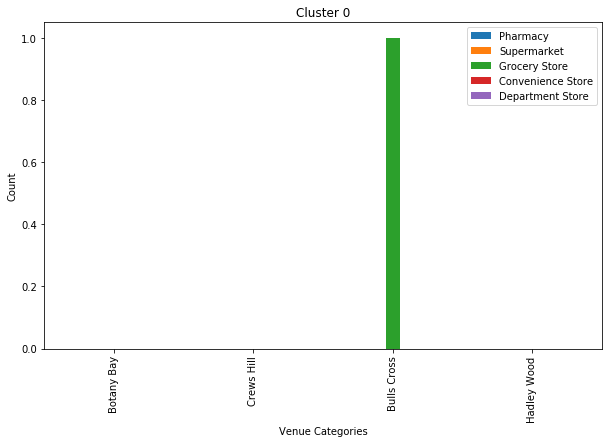

In [101]:
cls0=Enfield_merged.loc[Enfield_merged['Cluster Labels'] == 0, Enfield_merged.columns[[1,2] + list(range(6, Enfield_merged.shape[1]))]]
cls0.drop(['Borough','Cluster Labels'],axis=1,inplace=True)
cls0=cls0.set_index('Neighbourhood')
cls0.plot(kind='bar', figsize=(10, 6))

plt.xlabel('Venue Categories') # add to x-label to the plot
plt.ylabel('Count') # add y-label to the plot
plt.title('Cluster 0') # add title to the plot

plt.show()

In [91]:
#Cluster 1
Enfield_merged.loc[Enfield_merged['Cluster Labels'] == 1, Enfield_merged.columns[[1,2] + list(range(6, Enfield_merged.shape[1]))]]


,Borough,Neighbourhood,Cluster Labels,Pharmacy,Supermarket,Grocery Store,Convenience Store,Department Store
7,Enfield,Enfield Lock,1,0,1,6,0,0
9,Enfield,Freezywater,1,0,3,6,0,0
12,Enfield,Palmers Green,1,1,2,6,1,0


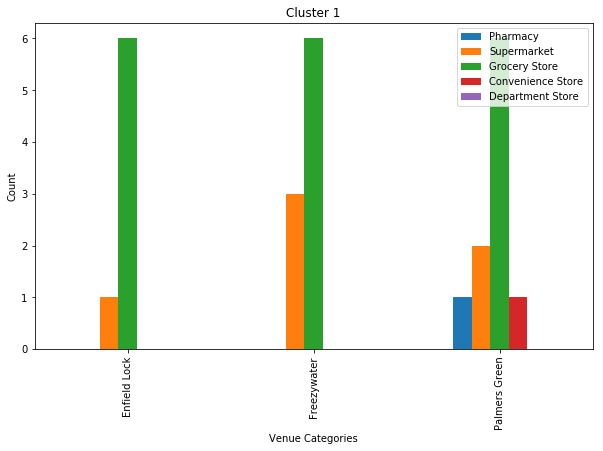

In [95]:
cls1=Enfield_merged.loc[Enfield_merged['Cluster Labels'] == 1, Enfield_merged.columns[[1,2] + list(range(6, Enfield_merged.shape[1]))]]
cls1.drop(['Borough','Cluster Labels'],axis=1,inplace=True)
cls1=cls1.set_index('Neighbourhood')
cls1.plot(kind='bar', figsize=(10, 6))

plt.xlabel('Venue Categories') # add to x-label to the plot
plt.ylabel('Count') # add y-label to the plot
plt.title('Cluster 1') # add title to the plot

plt.show()

In [83]:
#Cluster 2
Enfield_merged.loc[Enfield_merged['Cluster Labels'] == 2, Enfield_merged.columns[[1,2] + list(range(6, Enfield_merged.shape[1]))]]

,Borough,Neighbourhood,Cluster Labels,Pharmacy,Supermarket,Grocery Store,Convenience Store,Department Store
1,Enfield,Ponders End,2,1,5,2,0,0
6,Enfield,Enfield Highway,2,1,4,3,0,0
15,Enfield,Winchmore Hill,2,0,3,2,0,0
16,Enfield,Edmonton,2,0,4,2,1,0


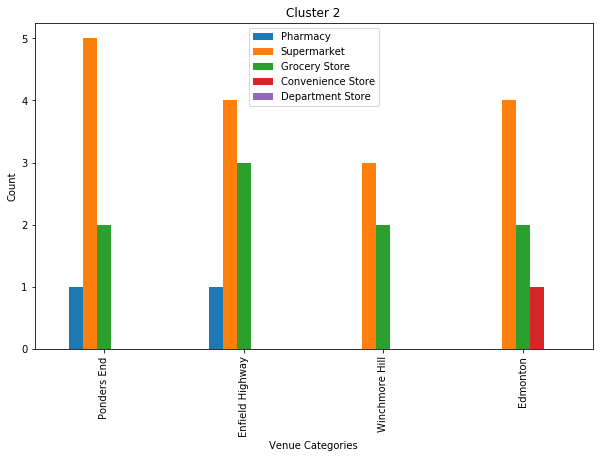

In [100]:
cls2=Enfield_merged.loc[Enfield_merged['Cluster Labels'] == 2, Enfield_merged.columns[[1,2] + list(range(6, Enfield_merged.shape[1]))]]
cls2.drop(['Borough','Cluster Labels'],axis=1,inplace=True)
cls2=cls2.set_index('Neighbourhood')
cls2.plot(kind='bar', figsize=(10, 6))

plt.xlabel('Venue Categories') # add to x-label to the plot
plt.ylabel('Count') # add y-label to the plot
plt.title('Cluster 2') # add title to the plot

plt.show()

In [84]:
#Cluster 3
Enfield_merged.loc[Enfield_merged['Cluster Labels'] == 3, Enfield_merged.columns[[1,2] + list(range(6, Enfield_merged.shape[1]))]]

,Borough,Neighbourhood,Cluster Labels,Pharmacy,Supermarket,Grocery Store,Convenience Store,Department Store
5,Enfield,Brimsdown,3,0,2,2,0,0
8,Enfield,Enfield Wash,3,0,1,4,0,0
11,Enfield,Arnos Grove,3,0,0,4,1,0
13,Enfield,Southgate,3,1,1,2,0,0


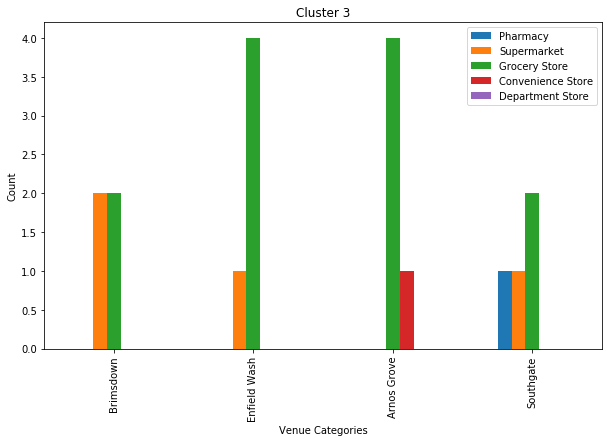

In [99]:
cls3=Enfield_merged.loc[Enfield_merged['Cluster Labels'] == 3, Enfield_merged.columns[[1,2] + list(range(6, Enfield_merged.shape[1]))]]
cls3.drop(['Borough','Cluster Labels'],axis=1,inplace=True)
cls3=cls3.set_index('Neighbourhood')
cls3.plot(kind='bar', figsize=(10, 6))

plt.xlabel('Venue Categories') # add to x-label to the plot
plt.ylabel('Count') # add y-label to the plot
plt.title('Cluster 3') # add title to the plot

plt.show()

In [85]:
#Cluster 4
Enfield_merged.loc[Enfield_merged['Cluster Labels'] == 4, Enfield_merged.columns[[1,2] + list(range(6, Enfield_merged.shape[1]))]]

,Borough,Neighbourhood,Cluster Labels,Pharmacy,Supermarket,Grocery Store,Convenience Store,Department Store
0,Enfield,Enfield Town,4,2,3,3,0,2
14,Enfield,Grange Park,4,1,2,1,0,2


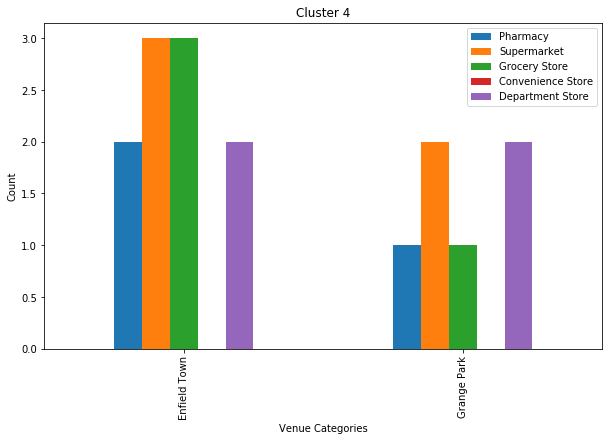

In [102]:
cls4=Enfield_merged.loc[Enfield_merged['Cluster Labels'] == 4, Enfield_merged.columns[[1,2] + list(range(6, Enfield_merged.shape[1]))]]
cls4.drop(['Borough','Cluster Labels'],axis=1,inplace=True)
cls4=cls4.set_index('Neighbourhood')
cls4.plot(kind='bar', figsize=(10, 6))

plt.xlabel('Venue Categories') # add to x-label to the plot
plt.ylabel('Count') # add y-label to the plot
plt.title('Cluster 4') # add title to the plot

plt.show()

#### ~ End ~